In [10]:
setwd("/root")
getwd()

[1] "/root"

In [43]:
library(tidyverse)
library(recipes)
library(laGP)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ stringr 1.4.0
✔ tidyr   1.1.0     ✔ forcats 0.5.0
✔ readr   1.3.1     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::extract()   masks magrittr::extract()
✖ dplyr::filter()    masks stats::filter()
✖ stringr::fixed()   masks recipes::fixed()
✖ dplyr::lag()       masks stats::lag()
✖ purrr::set_names() masks magrittr::set_names()



In [15]:
df0 <- readRDS("input/20150918_E900_baseline_selected.rds")
df1 <- df0
sum(df1$E900) # should be 79355.95

[1] 79355.95

In [29]:
XY <-
  df1 %>% 
  recipe(TTS ~ pid + Cu + Ni + Mn + P + fluence + temperature) %>% 
  step_dummy(pid) %>% 
  step_normalize(all_predictors()) %>% 
  prep() %>% 
  juice()

X <- select(XY, -TTS)
Y <- select(XY, TTS) %>% pull()

In [30]:
sapply(X, mean) %>% round(4)
sapply(X, sd) %>% round(4)

Cu          Ni          Mn           P     fluence temperature 
          0           0           0           0           0           0 
      pid_F       pid_W 
          0           0

Cu          Ni          Mn           P     fluence temperature 
          1           1           1           1           1           1 
      pid_F       pid_W 
          1           1

In [31]:
d <- darg(NULL, X)
g <- garg(list(mle=TRUE), Y)
gpi <- newGPsep(X, Y, d=rep(d$start, ncol(X)), g=g$start, dK=TRUE)
jmleGPsep(gpi, drange=c(d$min, d$max), grange=c(g$min, g$max))

d.1,d.2,d.3,d.4,d.5,d.6,d.7,d.8,g,tot.its,dits,gits,dconv
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>
13.93415,27.79141,25.98312,19.87414,2.049267,133.9208,133.9353,133.9353,0.01523278,359,275,84,0


In [36]:
p <- predGPsep(gpi, X, lite=TRUE)

In [37]:
p

$mean
   [1]  34.8804959  40.7573942  45.9968371  46.4411022  38.8202056  37.5130400
   [7]  45.4665600  47.6799400  50.2366199  52.9552657  56.0886641  56.9333150
  [13]  57.5508540  57.0788239  58.0760377  59.2773529  59.9731093  61.3207466
  [19]  63.4341205  67.7787615  75.6502723  76.6628337  75.1454038  74.7410797
  [25]  23.2673241  31.8707295  51.7347949 149.3904119  39.1149700  48.1273383
  [31]  66.8952044 132.2473645  12.0455712  14.1005289  15.1737868  13.6685922
  [37]  15.0487610  22.1402304  30.2516978  23.3739340  22.1637387  36.0904623
  [43]  31.7579093  57.1383234  63.8152148  69.3538037  31.7579093  57.1383234
  [49]  63.8152148  69.3538037   9.2101955  11.1418392  10.5385974  10.9525125
  [55]   5.6061549   8.0256959  13.1076644   8.0256959  13.1076644  13.9986714
  [61]  18.6281423  14.4196493  16.8975009  28.1690625  38.2171591  13.6837101
  [67]  17.1442958  21.8879866  36.7342897  11.8922508  14.0354825  17.6143087
  [73]  30.8171662  14.5963720  17.5906481  14.6858208  13.8381876   6.5470165
  [79]  12.2722926  22.4913473   6.5470165  12.2722926  22.4913473  25.2897450
  [85]  45.3274527  49.8001219  61.2564312  25.2897450  45.3274527  49.8001219
  [91]  61.2564312  12.7464513  19.4640496  27.5295035  32.4693597  26.0108922
  [97]  51.4394756  64.9081761  26.0108922  51.4394756  64.9081761  23.6172494
 [103]  39.9857732  50.3822205  59.9525796  23.6172494  39.9857732  50.3822205
 [109]  59.9525796  33.8416711  47.2001176  33.8416711  47.2001176  17.7714110
 [115]  38.2098005  46.4064148  17.7714110  38.2098005  46.4064148   4.2121367
 [121]   4.2121367   7.5101661   9.2490102  11.9123316  21.1262941  28.6120993
 [127]  11.9123316  21.1262941  28.6120993  13.0584761  18.8852613  26.8718269
 [133]  32.4496390  -2.4165269  -0.5630051   3.2062887  12.0838713  30.2229904
 [139]  31.3872834  35.9182213  50.9602533  64.8122953  39.7112199  41.9096491
 [145]  39.9381247  -1.3421672   3.2551786  37.3668722  42.1872856  37.8616038
 [151]  22.3239417   0.3367162   5.0420370  11.2817567   2.1425880   5.8566676
 [157]   8.8771620  36.3415720  41.4520789  41.9731906  50.3743929   5.4858723
 [163]   0.7915667   7.5837874  16.3679373  36.3691732  36.8910832   1.9632580
 [169]  14.8547470  18.2495066  93.9985237 153.1666356 154.6635381   2.1602487
 [175]  60.9552195  87.9033912  98.2746475   6.1564867  16.4910706   6.1564867
 [181]  16.4910706   2.0661248  16.7335601  58.3537484  67.1572887  73.7861940
 [187]  16.1859280   3.6052844   6.4711891  10.5179612  14.2718905   6.4711891
 [193]  10.5179612  14.2718905  44.6089027  60.1851439  60.1851439 107.9169768
 [199] 112.9142089  22.9875886  30.3274695  54.8000299  55.7541755  22.9875886
 [205]  30.3274695  54.8000299  55.7541755  48.0772682  75.5592365  78.8485995
 [211] 192.0584454 149.0438041 155.4906540 153.5794609   9.4354716   9.7582815
 [217]  17.8762164  37.1601857  55.3044953  70.4193009   2.2181956   4.9743983
 [223]   8.3854395   8.2498986  13.5852966  19.6625698   8.2498986  13.5852966
 [229]  19.6625698  27.7635715  48.2240768  35.3939420  54.2205390  60.4122268
 [235]  62.8674405  35.3939420  54.2205390  60.4122268  62.8674405  16.2762904
 [241]  27.2416856  31.6965494  38.6019963  16.2762904  27.2416856  31.6965494
 [247]  38.6019963  27.8254938  36.0040247  44.7760718 100.1348310 105.9399390
 [253] 108.0976567 114.8505093  42.5852944   8.1225855  13.3885098  18.1114315
 [259]   8.1225855  13.3885098  18.1114315   4.9074238   9.4727508  36.2336036
 [265]  57.5576475  60.5293607  36.2336036  57.5576475  60.5293607  67.7891537
 [271]  93.4992700  92.5147721  95.4915580  31.9954693  47.0084366  57.2059697
 [277]  31.9954693  57.2059697  37.9730963  38.3804850  51.1734552  91.7235575
 [283]  64.2325977  56.3084211  75.4196579  64.0963190  45.6286444  49.9179562
 [289]  31.3402145  32.8833485  47.9529701  48.4869682  28.7396007  48.8378421
 [295]  56.3583494  59.0163530  28.7396007  48.8378421  56.3583494  59.0163530
 [301]  73.9319372  95.6058522 115.0148518 1

In [38]:
df1$gpm <- p$mean
df1$gps <- sqrt(p$s2)

In [40]:
sqrt(mean((df1$TTS - df1$gpm)^2))

[1] 10.77626

In [52]:
grouped <- 
  df1 %>% 
  group_by(pid, Cu, Ni, Mn, P) %>% 
  nest() %>% 
  rowid_to_column() %>% 
  mutate(ndata = map_int(data, nrow)) %>%
  relocate(rowid, ndata) %>%
  unnest(data)
grouped

rowid,ndata,Cu,Ni,Mn,P,pid,product_id,temperature,fluence,TTS,E900,fl,gpm,gps
<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,24,0.20,0.180,1.36,0.012,P,P,290,2.56894e+18,26.13240,31.74387,0.256894,34.88050,11.85729
1,24,0.20,0.180,1.36,0.012,P,P,290,3.92750e+18,41.02480,36.39799,0.392750,40.75739,11.76211
1,24,0.20,0.180,1.36,0.012,P,P,290,5.46005e+18,41.03000,40.40681,0.546005,45.99684,11.70752
1,24,0.20,0.180,1.36,0.012,P,P,290,5.61174e+18,42.15410,40.75832,0.561174,46.44110,11.70426
1,24,0.20,0.180,1.36,0.012,P,P,290,3.44776e+18,55.34900,34.91371,0.344776,38.82021,11.78958
1,24,0.20,0.180,1.36,0.012,P,P,290,3.14321e+18,53.94340,33.89129,0.314321,37.51304,11.81029
1,24,0.20,0.180,1.36,0.012,P,P,290,5.28448e+18,57.04070,39.99139,0.528448,45.46656,11.71170
1,24,0.20,0.180,1.36,0.012,P,P,290,6.05977e+18,50.58270,41.75965,0.605977,47.67994,11.69634
1,24,0.20,0.180,1.36,0.012,P,P,290,7.13764e+18,46.93470,43.97691,0.713764,50.23662,11.68580


In [54]:
grouped %>% arrange(desc(ndata)) %>% head()

rowid,ndata,Cu,Ni,Mn,P,pid,product_id,temperature,fluence,TTS,E900,fl,gpm,gps
<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
205,66,0.17,0.64,1.478,0.011,P,SRM,291.1111,5.70e+17,5.000000,21.76790,0.0570,16.19519,11.77231
205,66,0.17,0.64,1.478,0.011,P,SRM,291.1111,7.27e+17,4.444444,24.02882,0.0727,17.40277,11.75936
205,66,0.17,0.64,1.478,0.011,P,SRM,291.1111,1.71e+18,30.588889,32.63536,0.1710,24.53824,11.69564
205,66,0.17,0.64,1.478,0.011,P,SRM,278.8889,2.82e+18,40.000000,47.75232,0.2820,41.35780,11.56524
205,66,0.17,0.64,1.478,0.011,P,SRM,281.6667,2.56e+18,37.222222,44.02939,0.2560,37.47235,11.56313
205,66,0.17,0.64,1.478,0.011,P,SRM,279.4444,2.94e+18,33.888889,47.88545,0.2940,41.78950,11.56234


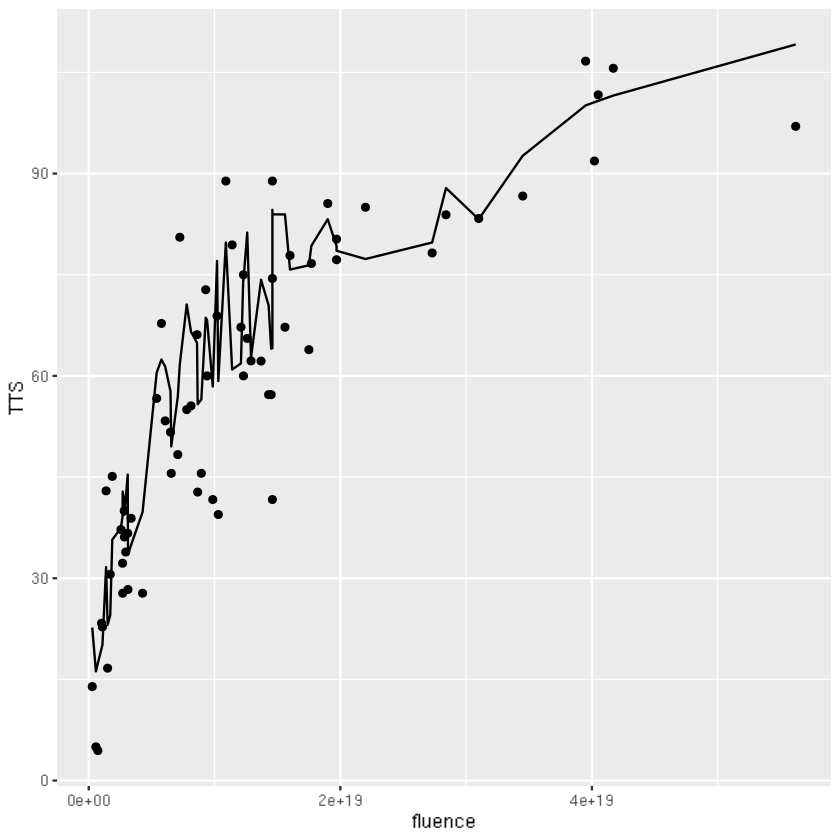

In [56]:
grouped %>%
  filter(rowid == 205) %>%
  arrange(fluence) %>%
  ggplot(aes(fluence, TTS)) +
  geom_point() +
  geom_line(aes(fluence, gpm))

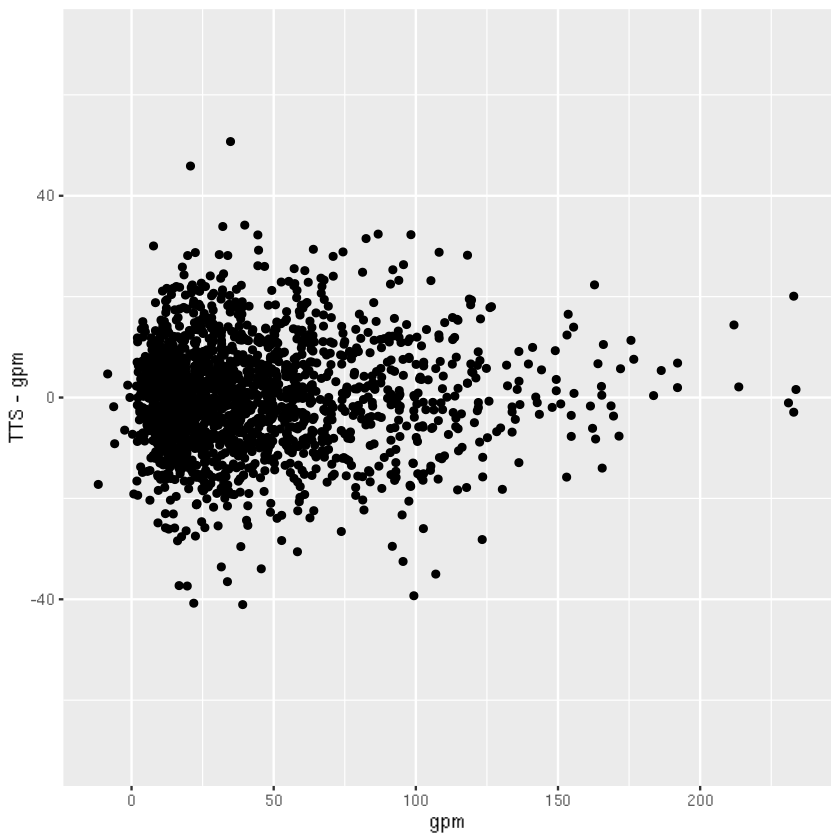

In [59]:
grouped %>%
  ggplot(aes(gpm, TTS - gpm)) +
  geom_point() +
  ylim(-70, 70)

In [60]:
object.size(gpi)

56 bytes